<a href="https://colab.research.google.com/github/Alriyan1/Data_Visualization_Tutorial/blob/main/EDA_TimeSeriesData_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [3]:
df=pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df.isnull().sum()

,0
Month,0
Thousands of Passengers,1


In [5]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df['Month']=pd.to_datetime(df['Month'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df.set_index('Month',inplace=True)

In [12]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

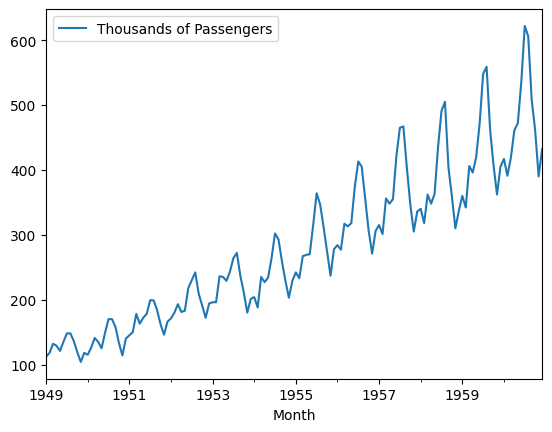

In [13]:
df.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
  result = adfuller(series)
  print('ADF Statistics: {}'.format(result[0]))
  print('P-value: {}'.format(result[1]))
  if result[1]<=0.05:
    print('Reject null hypothesis means data is stationary')
  else:
    print('Fail to reject null hypothesis means data is not stationary')

In [16]:
adf_test(df['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
P-value: 0.991880243437641
Fail to reject null hypothesis means data is not stationary


In [17]:
df['passengers first difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [18]:
df.head()

,Thousands of Passengers,passengers first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df['passengers first difference'].dropna())

ADF Statistics: -2.8292668241700047
P-value: 0.05421329028382478
Fail to reject null hypothesis means data is not stationary


In [20]:
df['passengers second difference']=df['passengers first difference']-df['passengers first difference'].shift(1)


In [21]:
adf_test(df['passengers second difference'].dropna())

ADF Statistics: -16.384231542468513
P-value: 2.7328918500142026e-29
Reject null hypothesis means data is stationary


In [22]:
df['passengers 12 difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)


In [23]:
adf_test(df['passengers 12 difference'].dropna())

ADF Statistics: -3.383020726492481
P-value: 0.011551493085514952
Reject null hypothesis means data is stationary


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

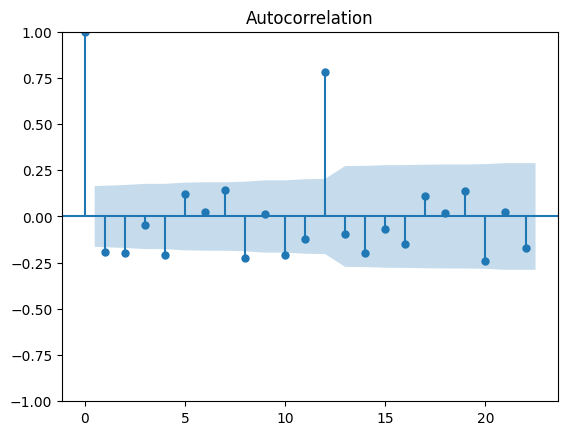

In [25]:
acf=plot_acf(df['passengers second difference'].dropna())

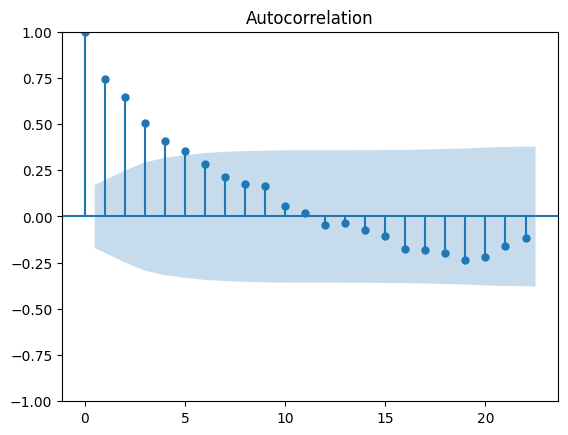

In [26]:
acf12 = plot_acf(df['passengers 12 difference'].dropna())

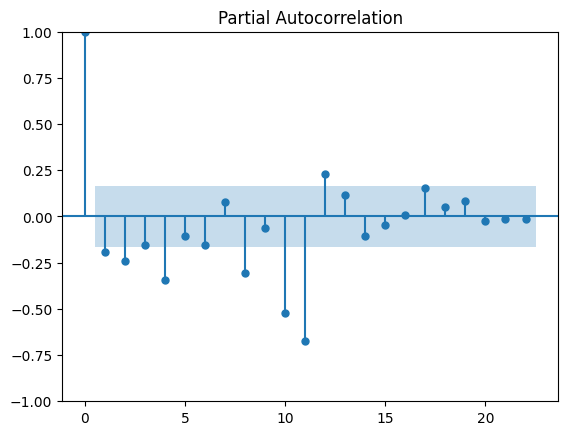

In [27]:
pacf = plot_pacf(df['passengers second difference'].dropna())

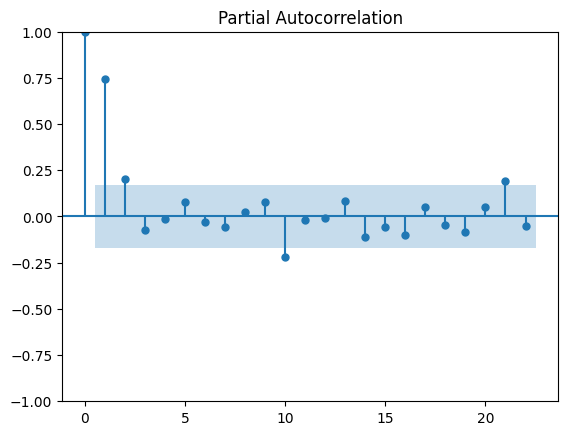

In [28]:
pacf12 = plot_pacf(df['passengers 12 difference'].dropna())

In [29]:
df.head()

,Thousands of Passengers,passengers first difference,passengers second difference,passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [30]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [31]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [32]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [33]:
test_data

,Thousands of Passengers,passengers first difference,passengers second difference,passengers 12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [34]:
from statsmodels.tsa.arima.model import ARIMA

In [35]:
train_data

,Thousands of Passengers,passengers first difference,passengers second difference,passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [36]:
model_arima=ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [37]:
model_arima_fit=model_arima.fit()

In [38]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Fri, 13 Dec 2024   AIC                            736.477
Time:                             08:35:15   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [40]:
pred=model_arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [41]:
residuals

,0
Month,
1956-01-01,-16.183612
1956-02-01,-32.478355
1956-03-01,0.556985
1956-04-01,5.172456
1956-05-01,-0.544234
1956-06-01,25.077917
1956-07-01,46.979713
1956-08-01,58.432466
1956-09-01,22.879031


<Axes: ylabel='Density'>

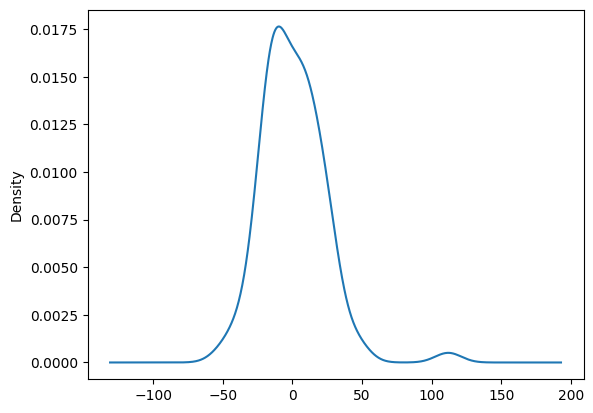

In [42]:
model_arima_fit.resid.plot(kind='kde')

In [43]:
test_data['Predicted_ARIMA']=pred

<ipython-input-43-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

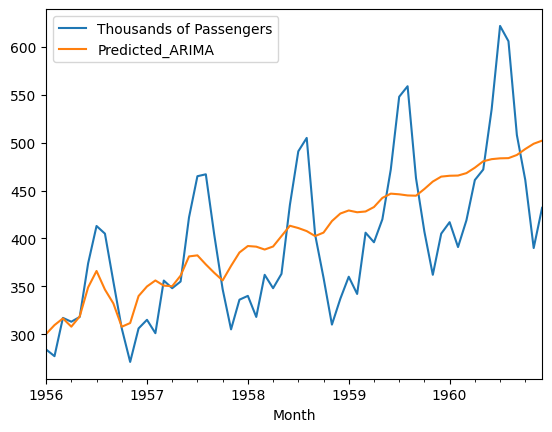

In [44]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [46]:
model_sarimax=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(1,1,1,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
model_sarimax_fit=model_sarimax.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
model_sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(1, 1, [1], 12)   Log Likelihood                -263.917
Date:                              Fri, 13 Dec 2024   AIC                            549.834
Time:                                      08:41:41   BIC                            574.877
Sample:                                  01-01-1949   HQIC                           559.804
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5538      3.179      0.174      0.862      -5.678       6.785
ar.L2          0.8495      0.374      2.270      0.023       0.116       1.583
ar.L3         -0.4145      2.894     -0.143      0.886      -6.088       5.259
ma.L1          0.2074      3.097      0.067      0.947      -5.862       6.277
ma.L2         -0.5096      2.283     -0.223      0.823      -4.984       3.965
ma.L3         -0.0947      0.661     -0.143      0.886      -1.391       1.202
ma.L4         -0.1901      0.509     -0.373      0.709      -1.188       0.808
ma.L5          0.1674      0.870      0.192      0.847      -1.538       1.873
ar.S.L12      -0.3132      0.853     -0.367      0.714      -1.985       1.359
ma.S.L12       0.1031      0.939      0.110      0.913      -1.736       1.943
sigma2        83.8928     28.583      2.935      0.003      27.870     139.915
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.91   Prob(JB):                         0.39
Heteroskedasticity (H):               2.41   Skew:                             0.40
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
test_data.tail()

,Thousands of Passengers,passengers first difference,passengers second difference,passengers 12 difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,483.883987
1960-09-01,508.0,-98.0,-82.0,45.0,487.184110
1960-10-01,461.0,-47.0,51.0,54.0,493.432791
1960-11-01,390.0,-71.0,-24.0,28.0,498.930080
1960-12-01,432.0,42.0,113.0,27.0,502.159832


In [50]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [51]:
pred_sarimax=model_sarimax_fit.predict(start=pred_start_date,end=pred_end_date)
residuals_sarimax=test_data['Thousands of Passengers']-pred_sarimax

<Axes: xlabel='Month'>

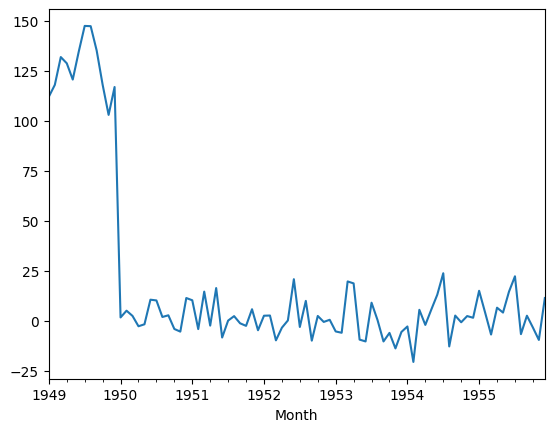

In [53]:
model_sarimax_fit.resid.plot()

<Axes: ylabel='Density'>

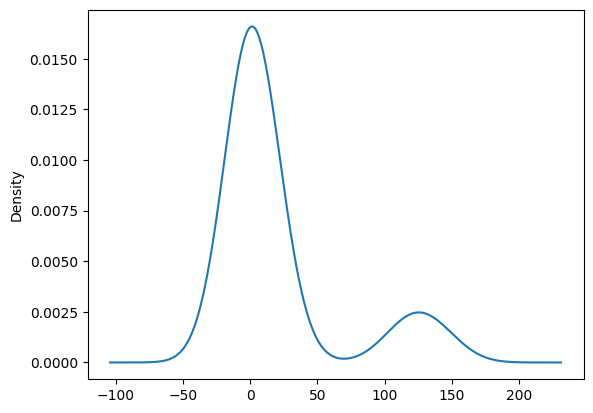

In [54]:
model_sarimax_fit.resid.plot(kind='kde')

In [55]:
test_data['Predicted_SARIMA']=pred_sarimax

<ipython-input-55-a11d4360bfbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_sarimax


In [56]:
test_data

,Thousands of Passengers,passengers first difference,passengers second difference,passengers 12 difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183612,283.137524
1956-02-01,277.0,-7.0,-13.0,44.0,309.478355,277.156683
1956-03-01,317.0,40.0,47.0,50.0,316.443015,309.019963
1956-04-01,313.0,-4.0,-44.0,44.0,307.827544,308.614928
1956-05-01,318.0,5.0,9.0,48.0,318.544234,310.536080
1956-06-01,374.0,56.0,51.0,59.0,348.922083,352.471382
1956-07-01,413.0,39.0,-17.0,49.0,366.020287,398.845407
1956-08-01,405.0,-8.0,-47.0,58.0,346.567534,382.799964
1956-09-01,355.0,-50.0,-42.0,43.0,332.120969,347.395968


<Axes: xlabel='Month'>

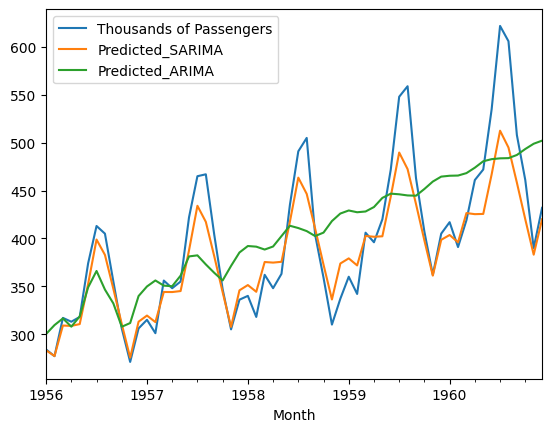

In [57]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()